## ND Interpolation

#### Experimental Example: Estimated Gas Flowrate

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.interpn.html

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator

In [3]:
import numpy as np

In [11]:
data_gas = np.genfromtxt('gas_flow_trim.csv', delimiter=',', skip_header = 1)

In [12]:
data_gas.shape

(3240, 6)

In [16]:
data_gas[0:3,:]

array([[ 1., 10.,  1.,  0.,  0.,  0.],
       [ 1., 10.,  1.,  0.,  5.,  0.],
       [ 1., 10.,  1.,  0., 10.,  0.]])

In [17]:
from scipy.interpolate import LinearNDInterpolator

In [19]:
model = LinearNDInterpolator(data_gas[:,:-1],data_gas[:,-1])

# Various model options from
# LinearNDI
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator
# NearestND
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.NearestNDInterpolator.html#scipy.interpolate.NearestNDInterpolator
# Interpn
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.interpn.html



In [35]:
# Input parameter to perform estimation

Pressure     = 0.7 # 0.5 to 1 EMW
Permeability = 100 # 10 to 3000 md
Thickness    = 50  # 1 - 50 meters
Inclination  = 30  # 0 to 60
WGR          = 10  # 0 to 100 STB/MMscf




In [36]:
gasflow = model(Pressure, Permeability, Thickness, Inclination, WGR)
gasflow

print('gas flow rate = ' + str(gasflow) + ' MMscf/D')

gas flow rate = 16.5 MMscf/D


# Play around with parameters
# Perform uncertainty quantification

In [78]:
# Example, we have uncertainly on Permeability

Permeability_arr = np.linspace(200, 2000, num=100)
Permeability_arr

array([ 200.        ,  218.18181818,  236.36363636,  254.54545455,
        272.72727273,  290.90909091,  309.09090909,  327.27272727,
        345.45454545,  363.63636364,  381.81818182,  400.        ,
        418.18181818,  436.36363636,  454.54545455,  472.72727273,
        490.90909091,  509.09090909,  527.27272727,  545.45454545,
        563.63636364,  581.81818182,  600.        ,  618.18181818,
        636.36363636,  654.54545455,  672.72727273,  690.90909091,
        709.09090909,  727.27272727,  745.45454545,  763.63636364,
        781.81818182,  800.        ,  818.18181818,  836.36363636,
        854.54545455,  872.72727273,  890.90909091,  909.09090909,
        927.27272727,  945.45454545,  963.63636364,  981.81818182,
       1000.        , 1018.18181818, 1036.36363636, 1054.54545455,
       1072.72727273, 1090.90909091, 1109.09090909, 1127.27272727,
       1145.45454545, 1163.63636364, 1181.81818182, 1200.        ,
       1218.18181818, 1236.36363636, 1254.54545455, 1272.72727

In [79]:
Pressure_arr = np.linspace(0.6, 0.9, num=100)
Pressure_arr

array([0.6       , 0.6030303 , 0.60606061, 0.60909091, 0.61212121,
       0.61515152, 0.61818182, 0.62121212, 0.62424242, 0.62727273,
       0.63030303, 0.63333333, 0.63636364, 0.63939394, 0.64242424,
       0.64545455, 0.64848485, 0.65151515, 0.65454545, 0.65757576,
       0.66060606, 0.66363636, 0.66666667, 0.66969697, 0.67272727,
       0.67575758, 0.67878788, 0.68181818, 0.68484848, 0.68787879,
       0.69090909, 0.69393939, 0.6969697 , 0.7       , 0.7030303 ,
       0.70606061, 0.70909091, 0.71212121, 0.71515152, 0.71818182,
       0.72121212, 0.72424242, 0.72727273, 0.73030303, 0.73333333,
       0.73636364, 0.73939394, 0.74242424, 0.74545455, 0.74848485,
       0.75151515, 0.75454545, 0.75757576, 0.76060606, 0.76363636,
       0.76666667, 0.76969697, 0.77272727, 0.77575758, 0.77878788,
       0.78181818, 0.78484848, 0.78787879, 0.79090909, 0.79393939,
       0.7969697 , 0.8       , 0.8030303 , 0.80606061, 0.80909091,
       0.81212121, 0.81515152, 0.81818182, 0.82121212, 0.82424

In [80]:
gasflow_sim = []

for Pressure_sim in Pressure_arr:
    for Perm_sim in Permeability_arr:
        output = model(Pressure_sim, Perm_sim, Thickness, Inclination, WGR)
        gasflow_sim.append(output)

In [85]:
len(gasflow_sim)

10000

(array([ 55., 419., 423., 474., 424., 469., 439., 462., 520., 588., 560.,
        564., 589., 588., 566., 569., 590., 595., 594., 512.]),
 array([11.9  , 12.545, 13.19 , 13.835, 14.48 , 15.125, 15.77 , 16.415,
        17.06 , 17.705, 18.35 , 18.995, 19.64 , 20.285, 20.93 , 21.575,
        22.22 , 22.865, 23.51 , 24.155, 24.8  ]),
 <a list of 20 Patch objects>)

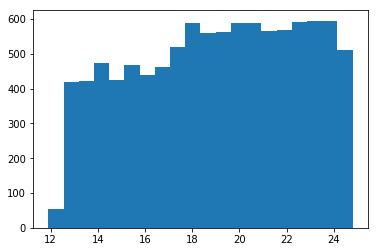

In [84]:
plt.hist(gasflow_sim, bins=20)